# Hands-on Machine Learning with Multilingual Image-Text Fashion Dataset

*Experiment with Zero-shot CLIP classifiction and image search with the largest multilingual image-text classification dataset and benchmark GLAMI-1M.*


![GLAMI-1M Image](https://raw.githubusercontent.com/glami/glami-1m/main/media/glami-1m-dataset-examples.png)


**Description**
Come, see, and try working with over one million fashion products from the [GLAMI-1M](https://github.com/glami/glami-1m) dataset using modern techniques. For each product, this dataset contains an image, item description in one of 13 languages, and a category label (191 classes). You will learn how to use the popular CLIP model for zero-shot classification and image search.

Whether you are just starting or an expert in machine learning, come to discover this new real-world dataset in a fun way.

**Speaker**
[Vaclav Kosar](https://vaclavkosar.com/), Machine Learning Engineer @ [GLAMI](https://glami.group/)

**Venue**
This event takes place on-line (link is in the sidebar) and off-line:
GLAMI, Corso 2a, Křižíkova 148/34, 186 00, Prague 8. Reception desk will have all the necessary information.

**Recording**
The recording is [available on Youtube here](https://youtu.be/jLFJObPWU1U).

**Questions** Please don't hesitate to ask any questions you may have, this is an open forum and we encourage participation to accelerate learning.



## GLAMI-1M Dataset

GLAMI-1M contains 1.1 million fashion items, 968 thousand unique images and 1 million unique texts. It contains 13 languages, mostly European. And 191 fine-grained categories, for example we have 15 shoe types. It contains high quality annotations from professional curators and it also presents **a difficult production industry problem**.

![](https://github.com/glami/glami-1m/blob/main/media/glami-1m-dataset-examples-table.png?raw=true)

Each sample contains an **image, country code, name in corresponding language, description, target category and source of the label** which can be of multiple types, it can be human or rule-based but most of the samples are **human-based labels**.

![](https://raw.githubusercontent.com/glami/glami-1m/main/media/train-test-distribution-per-category.png)


In GLAMI-1M, small amount of categories form the large portion of the data set. Meaning, that the distribution of product items across the product categories is highly long-tailed, which is a common problem in industrial data.


![](https://raw.githubusercontent.com/glami/glami-1m/main/media/train-test-distribution-per-geo.png)

In addition, above we can see distribution across different languages. There is over-representation in certain languages, but we see much less inbalance compared to the category distribution.

GLAMI-1M is the largest multilingual image text classification dataset. It is the second largest image text classification dataset. It is second to Recipe1M+ which contains only English. Contrary to Recipe1M+, in GLAMI-1M we have more languages and more human labels. In fashion domain, GLAMI-1M is larger and has more categories than FashionGen dataset.

GLAMI-1M is indeed smaller than open source webscape dataset like LAION-5B, but those are not suitable for classification task. In this notebook, we experiment with M-CLIP model trained on LAION-5B.

**Paper Authors:**
The GLAMI-1M paper authors are Vaclav Kosar, Antonin Hoskovec, Milan Šulc and Radek Bartizal. The funding institutions are [GLAMI](https://glami.group/), Rossum, Czech Technical University, Faculty of Science and Nuclear Engineering. This paper was published at British Machine Vision Conference 2022 (BMVC).


**More Information:**
- [GLAMI-1M Code](https://github.com/glami/glami-1m), [GLAMI-1M Data Files](https://huggingface.co/datasets/glami/glami-1m)
- [GLAMI-1M Paper](https://bmvc2022.mpi-inf.mpg.de/0607.pdf), [Supplementary](https://docs.google.com/viewer?url=https://github.com/glami/glami-1m/raw/main/media/GLAMI-1M%20Supplementary.pdf), [Poster](https://bmvc2022.mpi-inf.mpg.de/0607_poster.pdf)
- [GLAMI-1M Blog Post](https://medium.com/@glami-engineering/glami-1m-multilingual-image-text-fashion-dataset-a72691b6fedb)
- [GLAMI-1M Benchmark at Papers with Code](https://paperswithcode.com/paper/glami-1m-a-multilingual-image-text-fashion-1)
- [GLAMI-1M Hands-On Meetup Event](https://www.meetup.com/miton-times/events/291311521/)




## Encoding Images, Texts, and Categories into Similar Numbers

![](https://github.com/glami/glami-1m/blob/main/media/multilingual-zero-shot-classification.drawio.png?raw=true)

Machine learning models can **turn image bits in your computer into a special array of numbers called vector embedding**. You can image that as if the image was translated from bytes for display into a point on a paper, so 2D. Or point in a room, so 3D. Or truer yet, a point in a space with **512 dimensions**.

We can **do the same thing for text**. So that means we can take any texts in any language and map them to **the same sized array of numbers as for image**. And this array we can compare these vectors.

Now, just turning things into points in space is not useful by itself, but **thanks to powerful computers and data from the internet**, we can find useful mapping from text or images to a points in space, such that certain **semantic similarities are preserved**. So similar images in a human sense will have these **points close together**. The same texts of similar meaning for humans.

Finding this mapping, we call training a machine learning model, as if to learn to translate texts and images into points while preserving meaning.

We can use this for finding similarities, similar images, similar products. And we can **also use this to find similarities between products and categories**. So we can find a category where a product belongs. How would you do that? Well, product category is a name, and the name of the category represents a text which needs to be similar semantically to the product itself. So if the product belongs to the category, the text of the category should be close to the product itself.

What we are using here is something called **multimodality**. It means that we have a model that is capable of understanding more than one modality of input. It can work with different types of inputs: images, texts, and other. These kinds of models are increasingly popular, because we often deal with multimodal data as the **two sensory inputs complement each other**.

Another feature we may want is dealing with multiple languages. We may want to be able to have **a symmetric solution, symmetric systems across different languages** and countries. For this, we need to be able to **encode text regardless of the language** the same way.


## Make a Copy of This Notebook
If you would like to follow along and execute this notebook, I recommend to make a copy of this notebook into you Google Drive for future viewing.

To execute this notebook you need a GPU runtime: Runtime -> Change Runtime -> GPU or TPU. If you cannot get the accelerator, try changing the device below and execute without, but that was not tested.

In [ ]:
device = 'cuda'
# device = 'cpu'

## Setting up the environment
Install GLAMI-1M Repository and packages, later restart and rerun.

In [ ]:
# Ignore this or search what it is.
%load_ext autoreload
%autoreload 2

In [ ]:
import os

if os.environ.get('original_working_dir') is None:
  os.environ['original_working_dir'] = os.getcwd() + '/'

os.chdir(os.environ['original_working_dir'])
!rm -rf 'glami-1m'
!git clone https://github.com/glami/glami-1m.git
os.chdir(os.environ['original_working_dir'] + '/glami-1m')

Cloning into 'glami-1m'...
remote: Enumerating objects: 332, done.
remote: Counting objects: 100% (164/164), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 332 (delta 108), reused 129 (delta 81), pack-reused 168
Receiving objects: 100% (332/332), 4.26 MiB | 15.32 MiB/s, done.
Resolving deltas: 100% (192/192), done.


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git (to revision d50d76daa670286dd6cacf3bcd80b5e4823fc8e1) to /tmp/pip-req-build-zhp_e1um
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-zhp_e1um
  Running command git rev-parse -q --verify 'sha^d50d76daa670286dd6cacf3bcd80b5e4823fc8e1'
  Running command git fetch -q https://github.com/openai/CLIP.git d50d76daa670286dd6cacf3bcd80b5e4823fc8e1
  Running command git checkout -q d50d76daa670286dd6cacf3bcd80b5e4823fc8e1
  Resolved https://github.com/openai/CLIP.git to commit d50d76daa670286dd6cacf3bcd80b5e4823fc8e1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 91.2 MB/s eta 0:00:00


## Now restart the kernel and re-run from start!
We need to restart here because the Python kernel loaded new dependencies, meaning that we loaded new libraries and we need to restart the Python executor.

Of course, don't loop yourself here for ever 😀.



## Download, Load, and Sample From GLAMI-1M Test Set

Now, we will download the dataset itself. We will not download the full version because it would take 30 minutes to download. Instead, we will download only a smaller test set, which contain 100k products.

The datasets in general are always split into the training set and testing set. The training set is used for training only while the testing set is used for evaluation. So we keep the testing set apart. Model never sees the testing set before it is only evaluated on it. We test the generalization properties of models doing this.


In [ ]:
import os
import load_dataset;


os.environ['EXTRACT_DIR'] = "/tmp/GLAMI-1M/"

# Full dataset from takes 30 minutes to download.
# load_dataset.download_dataset(dataset_url="https://huggingface.co/datasets/glami/glami-1m/resolve/main/GLAMI-1M-dataset.zip")

# Test set only is fast! Download in 30 to 90 seconds!
load_dataset.download_dataset(dataset_url="https://huggingface.co/datasets/glami/glami-1m/resolve/main/GLAMI-1M-dataset--test-only.zip")



Downloading: 100%|██████████| 1.39G/1.39G [01:16<00:00, 18.1MB/s]


Unzipping


100%|██████████| 116008/116008 [00:23<00:00, 4897.90it/s]


Now let's display the data set itself. We have it downloaded on our local machine. And now we can use functions from the GLAMI-1m repository to load a Pandas data frame into a table.

Let's sample from the testing set for a purpose of experimentation in this notebook. We cannot display full 100k products, and so we will experiment with 10 products only.


In [ ]:
import load_dataset;


df = load_dataset.get_dataframe('test')[['item_id', 'image_id', 'name', 'description', 'category_name', 'image_file']].copy()
sample_df = df.sample(10, random_state=41)
sample_df

,item_id,image_id,name,description,category_name,image_file
65725,641871,590722,Сникърси Lacoste,Lacoste Сникърси L001 0321 1 Sma 7-42SMA009240...,mens-sneakers,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/590722.jpg
61857,1259907,911673,ALPHA INDUSTRIES Kevad-sügisjope must,Jope tüüp: Lendurijope Kinnitamise tüüp: Tõmbl...,womens-bombers,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/911673.jpg
5906,318452,305203,Pánské lyžařské kalhoty KILPI RHEA-M červená,Kolekcia 2019 Pánske lyžiarske softshellové ...,mens-pants,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/305203.jpg
100861,493274,465127,MUSTANG Slip-on σκούρο μπλε,Μύτη παπουτσιού: Στρόγγυλη μύτη Είδος κλεισίμα...,womens-loafers-and-moccasins,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/465127.jpg
46129,945376,827939,"12,5 cm ilgio užkandžių šakutės WMF Nuova",,kitchen,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/827939.jpg
80708,852217,749997,Didelė Moteriška Piniginė Liu Jo,Liu Jo Didelė Moteriška Piniginė Ecs Xl Bilfor...,womens-wallets,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/749997.jpg
80566,52017,50114,SENSOR MERINO ACTIVE pánské spodky černá,Vlněné pánské spodky jsou vyrobeny z vysoce kv...,mens-undergarments,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/50114.jpg
12911,1091966,923776,MSGM Kids fruit logo graphic T-shirt - White,White cotton fruit logo graphic T-shirt from M...,girls-t-shirts-and-shirts,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/923776.jpg
91321,300304,288175,Steampunk sova čiernobiela - Klasické pánske t...,,mens-t-shirts-and-tank-tops,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/288175.jpg
34030,908951,798189,Jordan 23 Engineered Parka striukė,Sudėtis: 46% medvilnė 38% poliesteris ...,mens-parkas,/tmp/GLAMI-1M/GLAMI-1M-dataset/images/798189.jpg


Above table is a little bit sad. That is because we cannot see the images. We can display the images using a function provided in the GLAMI-1M repository called public dataset to HTML.

Below we can see different products with descriptions in different languages. So for example, we can see a sneaker, a bomber jacket, trousers, some loafer or moccasin shoe. Okay, so the data set actually contains 191 detailed categories. I may not know all of them. And I actually learned fair amount of about fashion categories developing for GLAMI. Okay, next item is a kitchen item, some forks. Then we have a wallet for women. Then we have a men's undergarment. It looks like a pants, but it's undergarment. Then they have a Carol's t-shirt and shirt. Then we have a men's t-shirt and tank top. Then we have a men's parka, which is a type of a jacket.

item_id,image_file,name,description,category_name
641871,,Сникърси Lacoste,Lacoste Сникърси L001 0321 1 Sma 7-42SMA0092407 Бял,mens-sneakers
1259907,,ALPHA INDUSTRIES Kevad-sügisjope must,"Jope tüüp: Lendurijope Kinnitamise tüüp: Tõmblukk Muster: Ühevärviline Disain: Külgmised sisseõmmeldud taskud, Sirge lõige, Ülemõõduline, Soonikkätised, Riba- kootud soonikkrae Materjal: Kunstkarv Rinnaga toitmine: Kergelt vooderdatud Lisad: Pehme materjal, Toon toonis õmblused, Vetthülgav Istuvus: Lõtv tegumood",womens-bombers
318452,,Pánské lyžařské kalhoty KILPI RHEA-M červená,"Kolekcia 2019 Pánske lyžiarske softshellové nohavice Kilpi RHEA-M s predtvarovanými kolenami pre lepšiu voľnosť pohybu. Nohavice majú dve hlavné vrecká na zipsy a jedno zadné vrecko na zips. Nohavice u nohavice sú rozopínajúce a majú snehové manžety. Nohavice sú tiež vybavené ochranou proti okopaniu. Pas sa dá regulovať suchým zipsom, zapínanie nohavíc je na zips a na dva patenty, traky odnímateľné. Priedušný a vodeodpudivý materiál Siberium 10 000 SRC SS materiál Siberium 10.000 SRC SS vodeodolnosť 10 000 mm cm2, priedušnosť 10.000 g m2 24h predtvarované kolená 2 hlavné vrecká na zips, 1 vrecko vzadu, tiež na zips rozopínajúce nohavice s ochranou proti okopaniu nastaviteľný pás pomocou suchého zipsu odnímateľné traky",mens-pants
493274,,MUSTANG Slip-on σκούρο μπλε,"Μύτη παπουτσιού: Στρόγγυλη μύτη Είδος κλεισίματος: Παντοφλέ Σχέδιο: Μονόχρωμα Σχεδιασμός: Διακοσμητική ραφή, Ελαστικό ένθεμα, Ενισχυμένη φτέρνα, Τρακτερωτή σόλα Υλικό: Ύφασμα, Απομίμηση δέρματος Έξτρα: Επενδεδυμένο άκρο πάνω μέρους μπότας, Ευέλικτη σόλα, Εκτύπωση ετικέτας Ύψος τακουνιού: Χαμηλό τακούνι 0-3 cm",womens-loafers-and-moccasins
945376,,"12,5 cm ilgio užkandžių šakutės WMF Nuova",,kitchen
852217,,Didelė Moteriška Piniginė Liu Jo,Liu Jo Didelė Moteriška Piniginė Ecs Xl Bilford AA2072 E0086 Ruda,womens-wallets
52017,,SENSOR MERINO ACTIVE pánské spodky černá,"Vlněné pánské spodky jsou vyrobeny z vysoce kvalitní vlny Merino z Nového Zélandu. Funkční spodky z vlny merino jsou velmi příjemné na těle, a díky jemným a dlouhým vláknům přirozeně absorbují a odvádí vlhkost, hřejí, i když jsou vlhké. Funkční prádlo Merino je odolné proti zápachu i při delším nošení. Merino má vynikající termoregulační vlastnosti . SENSOR MERINO WOOL from Sensor Activewear on Vimeo .",mens-undergarments
1091966,,MSGM Kids fruit logo graphic T-shirt - White,"White cotton fruit logo graphic T-shirt from MSGM Kids featuring a round neck, a graphic print and short sleeves.",girls-t-shirts-and-shirts
300304,,Steampunk sova čiernobiela - Klasické pánske tričko - XS Biela,,mens-t-shirts-and-tank-tops
908951,,Jordan 23 Engineered Parka striukė,Sudėtis: 46% medvilnė 38% poliesteris 16% nailonas,mens-parkas

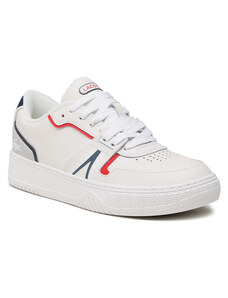
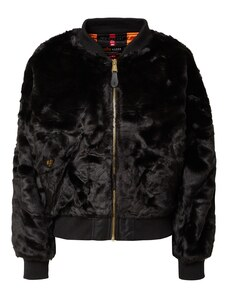
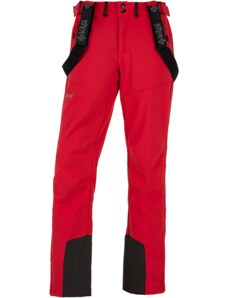
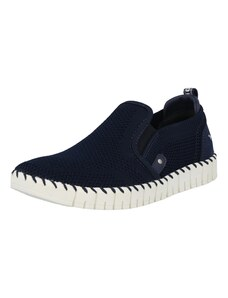
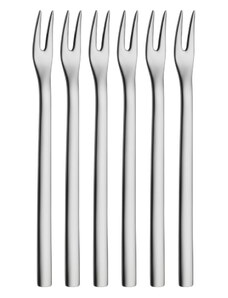
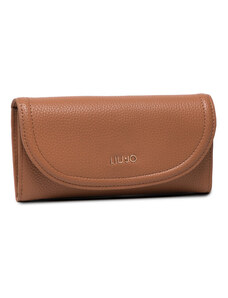
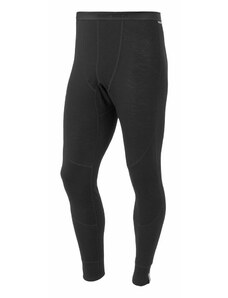
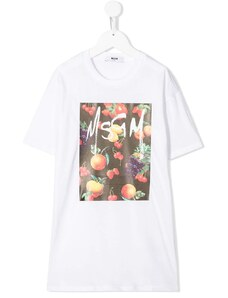
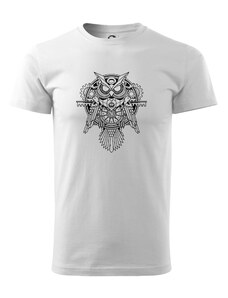
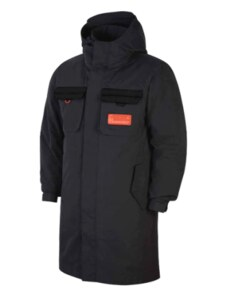

In [ ]:
from utils import public_dataset_to_html

public_dataset_to_html(sample_df)

## Load Multilingual CLIP Model

Okay, we loaded the data set. We saw the various items. We saw multiple languages, saw multiple categories.

Now we will load the model that I described above. The model which is made of two parts. One part can encode text. regardless of the language. Another part can encode the image.

Because the category itself has a name, we can use the name to later encode the category itself into the vector space as well. And then we will work on the vector space, find similarities between products and categorize the items.

Here we use a model called CLIP. It is a model from OpenAI trained on datasets of images and their captions from the internet.

And we use an open source textual model called Multilingual CLIP for encoding of the text which was also trained on millions to billions of images with their captions from the internet. In our case, this is an open source model and it was trained on various languages such that it map all of them to the right images. It doesn't mind seeing Cyrillic text, it doesn't mind seeing Greek letters, in general it doesn't mind seeing different language texts. It can still encode them correctly close to the images they correspond to.

Images are naturally multilingual. It may not be 100% true everywhere and all the time, but mostly it does not matter which country we are located in which language. The images generally for the same categories look similar enough such that you can, in most cases, work with models spanning multiple languages. It really depends on the use case. But in general, we can say that the images are already translated. They are already language agnostic.



In [ ]:
import clip
from multilingual_clip import pt_multilingual_clip
from multilingual_clip.pt_multilingual_clip import MultilingualCLIP
import transformers

model, preprocess = clip.load("ViT-B/32", device=device)

text_model_name = 'M-CLIP/XLM-Roberta-Large-Vit-B-32'
text_model: MultilingualCLIP = pt_multilingual_clip.MultilingualCLIP.from_pretrained(text_model_name, device=device)
tokenizer = transformers.AutoTokenizer.from_pretrained(text_model_name)

100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 112MiB/s]


Downloading:   0%|          | 0.00/221 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/616 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-large were not used when initializing XLMRobertaModel: ['lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

We downloaded the models. Those were both together around four gigabytes of data. Now let's look at how many parameters, how many numbers these models are composed of. You remember where I mentioned that these models can turn bytes of image data or bytes of text data into a single image. into points in vector space. Now, this is the function. This is the code that does it. It actually contains lots of numbers, which are then used to multiply or sum up with the bytes of the data of the image or text. in multiple steps, we do this in multiple layers, these kinds of operations. And we tune these numbers in these models in such a way that we can reproduce this, what human would expect, the similarity, that similar things are similar close together in this high dimensional space. Now, These models are not a small thing. You saw it's four gigabytes of data. And if we have a look at the cell below, we can see, we can calculate easily that they both have around hundreds of millions of these numbers that are used to apply on the bytes of the input data.


In [ ]:
import numpy as np

model.eval()
print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")

text_model.eval()
print("Text model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in text_model.parameters()]):,}")


Model parameters: 151,277,313
Text model parameters: 560,415,232


## Create Embeddings (Vector) Representation For The Above Samples

Okay, now we have the models loaded. Let's take our 10 samples and let's turn them into those points in the high dimensional vector space. We will do this by iterating over the samples. Then we will concatenate for each product, its name and description into a text. We will then open the image and convert it to format that is suitable for calculation of the model, which will be performed on our graphical processing unit GPU. After that, we then execute, apply, we apply the models on those bytes corresponding to the text and corresponding to the image. And we get the output vectors, the arrays of numbers, the points in the space that I told you about. We do some additional operation to help us then do this comparison for the similarity purposes. And then we store those representations and also print them below. Below you can see the points in the space as Yayi mentioned, those are, you know, numbers. These are arrays of numbers somewhere around zero. They can be positive or negative.


In [ ]:
import os
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from collections import OrderedDict
import torch


image_embeddings = []
text_embeddings = []
images = []
texts = []

for row in sample_df.itertuples(index=True):
    # print(row)

    text = row.name + ' ' + row.description    
    # tokens = tokenizer(name)
    texts.append(text[:30])

    image = Image.open(row.image_file).convert("RGB")
    image_input = torch.tensor(np.stack([preprocess(image)])).cuda()
    images.append(image)

    with torch.no_grad():
      image_embedding = model.encode_image(image_input).float()
      text_embedding = text_model.forward([text], tokenizer).float()
      # text_features = text_model.encode_text(tokens).float()

    image_embedding /= image_embedding.norm(dim=-1, keepdim=True)
    text_embedding /= text_embedding.norm(dim=-1, keepdim=True)

    image_embeddings.append(image_embedding.cpu().numpy())
    text_embeddings.append(text_embedding.cpu().numpy())

    print(image_embedding.shape)
    print(text_embedding.shape)

    print(image_embedding[0, 0:8])
    print(text_embedding[0, 0:8])



torch.Size([1, 512])
torch.Size([1, 512])
tensor([-0.0512,  0.0167,  0.0421,  0.0127, -0.0400,  0.0267, -0.0176,  0.0003],
       device='cuda:0')
tensor([-0.0168, -0.0202,  0.0162, -0.0023, -0.0431,  0.0337,  0.0169,  0.0172])
torch.Size([1, 512])
torch.Size([1, 512])
tensor([-0.0001,  0.0117,  0.0252, -0.0022,  0.0160, -0.0138, -0.0799, -0.0268],
       device='cuda:0')
tensor([-0.0108,  0.0487,  0.0182, -0.0063,  0.0064, -0.0180, -0.0807, -0.0243])
torch.Size([1, 512])
torch.Size([1, 512])
tensor([ 0.0221,  0.0322, -0.0228, -0.0022, -0.0297,  0.0031, -0.0550,  0.0307],
       device='cuda:0')
tensor([ 0.0173,  0.0583, -0.0090, -0.0133, -0.0730,  0.0263, -0.0294,  0.0269])
torch.Size([1, 512])
torch.Size([1, 512])
tensor([-0.0045, -0.0321,  0.0263, -0.0080, -0.0238,  0.0166, -0.0204, -0.0195],
       device='cuda:0')
tensor([ 0.0016, -0.0252,  0.0276, -0.0092, -0.0415, -0.0032,  0.0008,  0.0128])
torch.Size([1, 512])
torch.Size([1, 512])
tensor([-0.0226, -0.0084,  0.0166, -0.0125, -0

We have those vectors now, we have those arrays of numbers, those points in the space. And now let's do the comparison. So for each image, we have a representation for the text and we have a representation for the image. Now, if you'd like to do comparison for each text with each image, and see if we will see any kind of pattern that the corresponding text approximately matches the corresponding image. Let's see if this works.


In [ ]:
similarity = np.zeros((len(images), len(images)), dtype=float)
for i, image_embedding in enumerate(image_embeddings):
  for j, text_embedding in enumerate(text_embeddings):
    dot = image_embedding @ text_embedding.T
    similarity[i, j] = dot

similarity

array([[0.32170546, 0.1596625 , 0.21481672, 0.23024017, 0.15850498,
        0.17439416, 0.20271295, 0.19091384, 0.06432018, 0.19397044],
       [0.19960701, 0.30962235, 0.21893699, 0.17018083, 0.12392934,
        0.19059448, 0.22055674, 0.12949976, 0.11513549, 0.28352517],
       [0.21880822, 0.27415538, 0.35283637, 0.19493261, 0.20521465,
        0.244425  , 0.30580205, 0.1649102 , 0.13952287, 0.25590718],
       [0.24838777, 0.19186252, 0.22160567, 0.30410847, 0.15062648,
        0.18293893, 0.23480579, 0.10434719, 0.02291686, 0.16708688],
       [0.20428148, 0.17761719, 0.24677274, 0.18205445, 0.33977458,
        0.16829696, 0.24325666, 0.16073345, 0.12827782, 0.15227771],
       [0.18925637, 0.20889492, 0.20430066, 0.21231253, 0.15327214,
        0.32999116, 0.22152679, 0.08503684, 0.04969195, 0.11073164],
       [0.18766129, 0.23361586, 0.34878442, 0.19290467, 0.16950344,
        0.16018705, 0.355151  , 0.12505883, 0.13422872, 0.18793392],
       [0.2465048 , 0.19663101, 0.1925072

Okay, I have printed a path to matrix, which is a result. So for each image, each text, so we get a matrix. We get a matrix of values where if the value is close to one, it means that it's perfect similarity. If it's close to minus one, it's high dissimilarity. And now we would like to display that.

Note that some of the code is adopted from [Open CLIP Colab](https://colab.research.google.com/github/mlfoundations/open_clip/blob/master/docs/Interacting_with_open_clip.ipynb#scrollTo=uLFS29hnhlY4).

Text(0.5, 1.0, 'Cosine similarity between text and image embeddings')

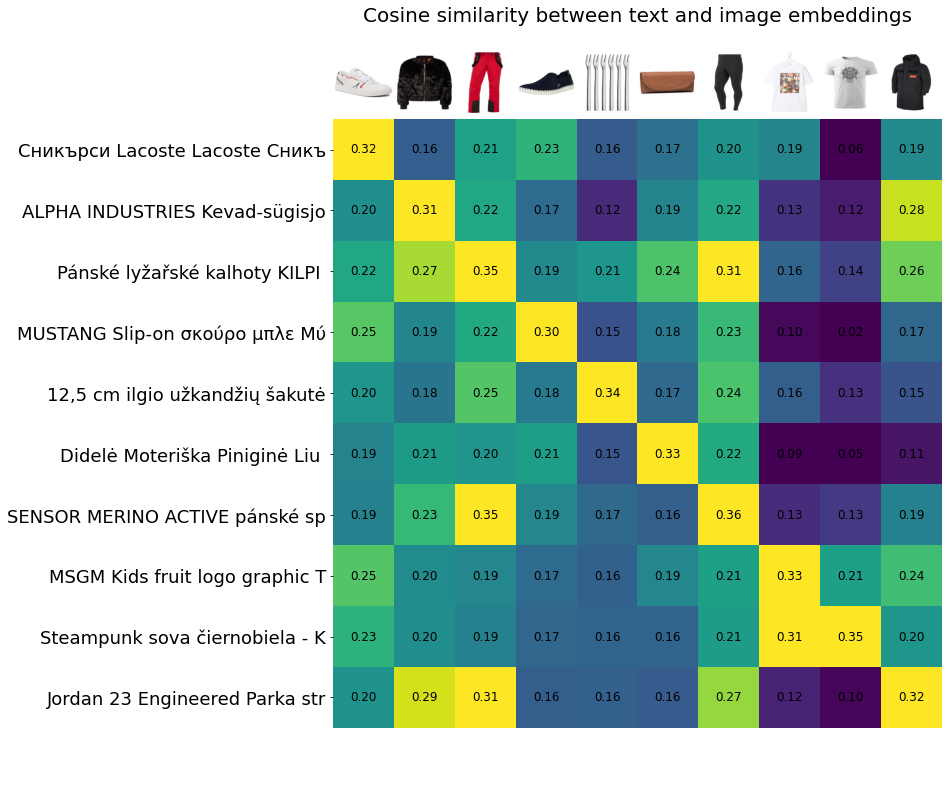

In [ ]:
count = len(texts)

plt.figure(figsize=(20, 14))
plt.imshow(similarity, vmin=0.1, vmax=0.3)
# plt.colorbar()
plt.yticks(range(count), texts, fontsize=18)
plt.xticks([])
for i, image in enumerate(images):
    plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")

for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

for side in ["left", "top", "right", "bottom"]:
  plt.gca().spines[side].set_visible(False)

plt.xlim([-0.5, count - 0.5])
plt.ylim([count + 0.5, -2])

plt.title("Cosine similarity between text and image embeddings", size=20)

Okay, above we can see that the images approximately correspond to the textual description. Yes, we can see some imperfections, but if we look along the diagonal, we can see that the sneaker corresponds to the sneaker description, that the pants corresponds to the pants description in Czech language, and that the fork corresponds to the fork description in English. I think that's Romanian and then as well the undergarments correspond to oh here okay have a look at this so here we can see that the undergarment does also correspond to pants as well which is expected and that this works but still the highest correspondence is between the arctic garment and the under garment description in the Czech language here. Okay, so and as well we can see that the shirts correspond to each other description as well, which is expected in this case as well. And also the jackets are very close together. So the jacket descriptions are close to the image descriptions.

I promised that we will also be doing categorization. As I mentioned, each category has a name. The name of the category itself is a text. We should be able to take this text and also create the vector for it and then use that for categorization because if we get this image and text, together to represent point in space, then this point in space should be close to the representation of the category. Because as I mentioned, all this should correspond close to each other. And we will see if this works in this case. How we can actually do this? How to encode correctly this? Well, so we will take the name of the category. and we will wrap it into surrounding text. And we will do this by simply saying, instead of a category name, I will say a photo of the category name, for example, men's sneakers, a type of a fashion product. And with this, we will sort of instruct the model. We will sort of add the meaning into this little bit, hoping that we improve the categorization.


In [ ]:
category_name_to_prompt = dict()
category_name_to_embedding = dict()
# category_names = df['category_name'].unique()
category_names = sample_df['category_name'].unique()
for cat_i, category_name in enumerate(category_names):
    human_readable_category_name = (category_name.strip()
                                    .replace('women-s', "women's").replace('womens', "women's")
                                    .replace('men-s', "men's").replace('mens', "men's").replace('-', ' ')
                                    .replace(' and ', ' or '))
    prompt = ("A photo of a " + human_readable_category_name + ", a type of fashion product")
    print(prompt)
    category_name_to_prompt[category_name] = prompt

    with torch.no_grad():
      prompt_embedding = text_model.forward([prompt], tokenizer).float()
      prompt_embedding /= prompt_embedding.norm(dim=-1, keepdim=True)
      category_name_to_embedding[category_name] = prompt_embedding.cpu().numpy()


A photo of a men's sneakers, a type of fashion product
A photo of a women's bombers, a type of fashion product
A photo of a men's pants, a type of fashion product
A photo of a women's loafers or moccasins, a type of fashion product
A photo of a kitchen, a type of fashion product
A photo of a women's wallets, a type of fashion product
A photo of a men's undergarments, a type of fashion product
A photo of a girls t shirts or shirts, a type of fashion product
A photo of a men's t shirts or tank tops, a type of fashion product
A photo of a men's parkas, a type of fashion product


Okay, so in above we created representations for the categories. Now below we'll compare those representations with the product representation. Product representation here will be an average of the image representation of the product and text representation of the product. So we will get single point for the product and single point for each category.

We will compare categories and products and we will display that in the similar way as previously and we will inspect if we can see some good performance from this approach.

In [ ]:
category_similarity = np.zeros((len(category_names), len(images)), dtype=float)
for i, category_name in enumerate(category_names):
  category_embedding = category_name_to_embedding[category_name]
  for j in range(len(sample_df)):
    item_embedding = (image_embeddings[j] + text_embeddings[j]) / 2
    dot = item_embedding @ category_embedding.T
    category_similarity[i, j] = dot

print(category_similarity.shape)
category_similarity

(10, 10)


array([[0.51852506, 0.41766998, 0.46697199, 0.52243316, 0.4180094 ,
        0.36533812, 0.46045864, 0.32509136, 0.23381993, 0.40455255],
       [0.42012942, 0.53304005, 0.48567832, 0.420984  , 0.39333135,
        0.37644657, 0.46456704, 0.34381872, 0.25259992, 0.46431068],
       [0.43012574, 0.43227792, 0.56062716, 0.44162464, 0.4272536 ,
        0.37517861, 0.55406576, 0.34854493, 0.26555848, 0.40415534],
       [0.42664433, 0.3804349 , 0.43028063, 0.530604  , 0.40429512,
        0.3945967 , 0.42456287, 0.27093503, 0.19520693, 0.33602139],
       [0.40404063, 0.38073593, 0.3978816 , 0.38226137, 0.42889005,
        0.32963023, 0.40193376, 0.31640148, 0.19486378, 0.34015796],
       [0.3768937 , 0.38942516, 0.41796792, 0.42259246, 0.41655275,
        0.51029092, 0.41292846, 0.27225617, 0.18727055, 0.31538275],
       [0.42836344, 0.43209782, 0.50132197, 0.42933673, 0.43362936,
        0.37271017, 0.519611  , 0.34909192, 0.26129249, 0.3998372 ],
       [0.44804537, 0.43074569, 0.4427243

Text(0.5, 1.0, 'Cosine similarity between category prompt and image + text embeddings')

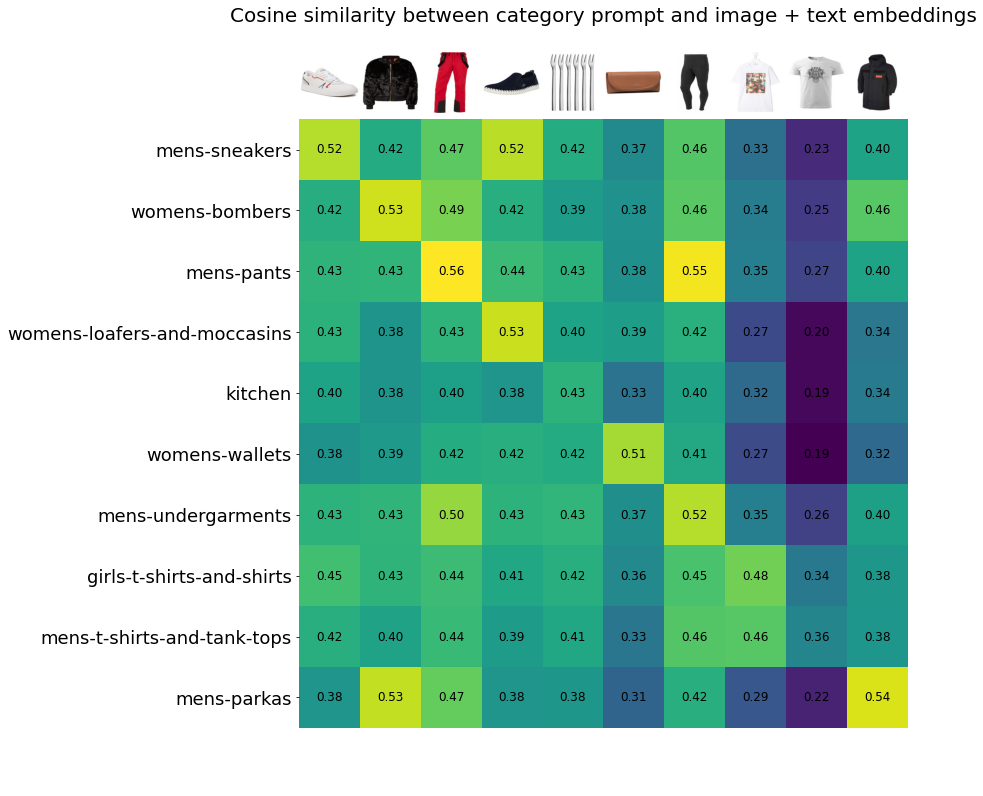

In [ ]:
count = len(category_names)

plt.figure(figsize=(20, 14))
plt.imshow(category_similarity, vmin=category_similarity.min(), vmax=category_similarity.max())
# plt.colorbar()
plt.yticks(range(count), category_names, fontsize=18)
plt.xticks([])


for i, image in enumerate(images):
    plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")

for x in range(category_similarity.shape[1]):
    for y in range(category_similarity.shape[0]):
        plt.text(x, y, f"{category_similarity[y, x]:.2f}", ha="center", va="center", size=12)

for side in ["left", "top", "right", "bottom"]:
  plt.gca().spines[side].set_visible(False)

plt.xlim([-0.5, count - 0.5])
plt.ylim([count + 0.5, -2])

plt.title("Cosine similarity between category prompt and image + text embeddings", size=20)

We can see actually in the comparison above that approximately each product goes into the right category. It is not always such a clear decision. For example, here in case of the jackets, the bomber jacket is not quite decisive for the model whether it's a jacket or a sweater. should be in Parkas or whether it should be in the bombers. So this is a difficult case for this type of model. But for example, in the case of sneakers, those definitely belong into the sneakers here. But for example, the loafers and moccassines are actually not so decided. It's very almost classified as sneakers but the Mocassians still are winning in this case. So, okay, nice. And the kitchen fork, it doesn't seem to be very decisive, but it's, am I seeing it right? It's like saying that the forks should be pants. Okay. So we can see that the model can fail as well here. And then yes, we can look at the check its shirts. Approximately what you would expect.


## Classification Accuracy

The classification accuracy here is not good enough for production system. However, it is amazing that without training this model at all, by just having it try to perform the same thing it sees on the internet, the similarity between the image and text, which come together on websites, You can see that we can use this to do at least some basic categorization.

See [classification/eval_clip.py](https://github.com/glami/glami-1m/blob/main/classification/eval_clip.py) and [Supplementary Material](https://docs.google.com/viewer?url=https://github.com/glami/glami-1m/raw/main/media/GLAMI-1M%20Supplementary.pdf) you can find results for 32 token embeddings of classification Top-1 accuracy of 32% and Top-5 of 74%.

In [ ]:
# release memory
del model
del text_model

## Generate Visual Embeddings For The Entire Test Set
Now we would like to also try out searching. So since we have this number representation, which corresponds to the meaning, maybe if I have a meaning of an image, I can use that meaning to search for other images which correspond to this image, to this product. And we can do this.

However, there's an additional challenge here. We have a huge catalog of items. So there is so many products in the catalog, but you need to make a really fast search. How would you do this? How would you do this fast search? This is something very similar to other concepts in normal programming, where in here, you can use, we work with vectors, but we can use approaches which are similar to a hash map.

Hash map, instead of comparing your image to the entire huge catalog, it is able to do quick comparison with something intermediary and then do only a comparison on handful of smaller amount of products. We do this by sort of bucketing. So we quickly decide into which bucket we should look. And only after that, we look into the bucket and only compare there. And we can save time here. And you can do this hierarchically. And you can find things much faster. This is also called approximate nearest neighbor search. We will do this here.

We will use this index which is called ScaNN and it is from Google. It's implementation of one these the indexing approaches, one of the libraries you can use for this. And I will show you that you can do very fast search, which is kind of working nicely with just these couple tools, couple libraries that I introduced above. And you can see on an example that we will be actually able to very quickly search 100,000 items and return similar items.

Save time instead of generating the representations for our images, I will download the generated representations from the repository and we can then go quickly to the search problem.


In [ ]:
from classification.generate_clip_img_emb import generate_image_embeddings
import os

# Generate embedding for the whole test set in 13 minutes
# embeddings_array = generate_image_embeddings(df, all_into_memory_only=True)

# Or download and unzip in 3 minutes
!wget --timestamping https://huggingface.co/datasets/glami/glami-1m/resolve/main/embs-clip-visual.zip
!unzip -qn embs-clip-visual.zip -d $EXTRACT_DIR/

# And load embeddings in 1.5 minutes
from utils import chunker, load_embeddings
from load_dataset import CLIP_VISUAL_EMBS_DIR
embeddings_array = load_embeddings(df, CLIP_VISUAL_EMBS_DIR)

--2023-02-10 08:48:04--  https://huggingface.co/datasets/glami/glami-1m/resolve/main/embs-clip-visual.zip
Resolving huggingface.co (huggingface.co)... 3.231.67.228, 54.235.118.239, 2600:1f18:147f:e850:e203:c458:10cd:fc3c, ...
Connecting to huggingface.co (huggingface.co)|3.231.67.228|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/9c/21/9c2175150bdb8fa4a3b9c6faec05eedf3bcc8fb92f9a5aad3546a6df731d640c/dea7d24c5c59e70cce67ffac6ec768a0a1dfe7b667b099b098f4a9ff7480fb23?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27embs-clip-visual.zip%3B+filename%3D%22embs-clip-visual.zip%22%3B&Expires=1676278086&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzljLzIxLzljMjE3NTE1MGJkYjhmYTRhM2I5YzZmYWVjMDVlZWRmM2JjYzhmYjkyZjlhNWFhZDM1NDZhNmRmNzMxZDY0MGMvZGVhN2QyNGM1YzU5ZTcwY2NlNjdmZmFjNmVjNzY4YTBhMWRmZTdiNjY3YjA5OWIwOThmNGE5ZmY3NDgwZmIyMz9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPS

100%|██████████| 114/114 [01:48<00:00,  1.05it/s]


## Create Approximate Nearest Neighbor Index For Fast Search

Now that we loaded the representations, the embeddings, the points in space into memory, we will build our index, our scan index and use it in the next cell to do search.


In [ ]:
import numpy as np
from scann.scann_ops.py import scann_ops_pybind
from scann.scann_ops.py.scann_ops import ScannSearcher

num_leaves = int(np.sqrt(len(embeddings_array)))
n_neigh = 10


index_builder = scann_ops_pybind.builder(
    embeddings_array,
    num_neighbors=n_neigh,
    distance_measure="dot_product",
)

index_builder = index_builder.tree(num_leaves=num_leaves, num_leaves_to_search=2 * n_neigh)
index_builder = index_builder.score_ah(
            dimensions_per_block=2,
            anisotropic_quantization_threshold=0.2,
        ).reorder(2 * n_neigh)
index: ScannSearcher = index_builder.build()

Our index is created and stored in the index variable. Now I will select a sample from the 10 samples shown above. I will display the sample together with its text and image.

Int64Index([5906], dtype='int64')


item_id,image_file,name,description,category_name
318452,,Pánské lyžařské kalhoty KILPI RHEA-M červená,"Kolekcia 2019 Pánske lyžiarske softshellové nohavice Kilpi RHEA-M s predtvarovanými kolenami pre lepšiu voľnosť pohybu. Nohavice majú dve hlavné vrecká na zipsy a jedno zadné vrecko na zips. Nohavice u nohavice sú rozopínajúce a majú snehové manžety. Nohavice sú tiež vybavené ochranou proti okopaniu. Pas sa dá regulovať suchým zipsom, zapínanie nohavíc je na zips a na dva patenty, traky odnímateľné. Priedušný a vodeodpudivý materiál Siberium 10 000 SRC SS materiál Siberium 10.000 SRC SS vodeodolnosť 10 000 mm cm2, priedušnosť 10.000 g m2 24h predtvarované kolená 2 hlavné vrecká na zips, 1 vrecko vzadu, tiež na zips rozopínajúce nohavice s ochranou proti okopaniu nastaviteľný pás pomocou suchého zipsu odnímateľné traky",mens-pants

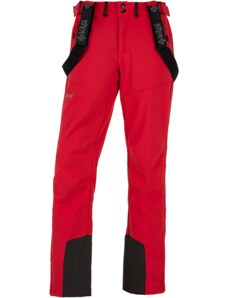

In [ ]:
# Select an item
sample_image_i = 2
sample_item_idx = sample_df.iloc[sample_image_i: sample_image_i + 1, :].index
print(sample_item_idx)
sample_item_df = df.loc[sample_item_idx]

from utils import public_dataset_to_html

public_dataset_to_html(sample_item_df)

Now we will use our index to search most similar products in the entire test set of 100,000 items. And we will do that in milliseconds.

[0.9999166  0.96320164 0.93617594 0.93090725]


item_id,image_file,name,description,category_name,similarity
318452,,Pánské lyžařské kalhoty KILPI RHEA-M červená,"Kolekcia 2019 Pánske lyžiarske softshellové nohavice Kilpi RHEA-M s predtvarovanými kolenami pre lepšiu voľnosť pohybu. Nohavice majú dve hlavné vrecká na zipsy a jedno zadné vrecko na zips. Nohavice u nohavice sú rozopínajúce a majú snehové manžety. Nohavice sú tiež vybavené ochranou proti okopaniu. Pas sa dá regulovať suchým zipsom, zapínanie nohavíc je na zips a na dva patenty, traky odnímateľné. Priedušný a vodeodpudivý materiál Siberium 10 000 SRC SS materiál Siberium 10.000 SRC SS vodeodolnosť 10 000 mm cm2, priedušnosť 10.000 g m2 24h predtvarované kolená 2 hlavné vrecká na zips, 1 vrecko vzadu, tiež na zips rozopínajúce nohavice s ochranou proti okopaniu nastaviteľný pás pomocou suchého zipsu odnímateľné traky",mens-pants,0.999917
1098560,,2AS Renkli Kadın Spor Kayak Pantalonu,"2AS Kadın Asama Kadın Kayak Pantolonu Kırmızı Renkli Morhipo'da online satışta! 2AS Spor Kayak Pantalonu modelleri ve indirimleri Morhipo'da. Spor Kayak Pantalonu fırsatını ve indirimlerini kaçırmayın. Ürün adı: 2ASW18001003REDTRE 2AS Asama Kadın Kayak,Renkli,M, Barkod: 8680618027006, MPN: 2ASW18001003REDTRETREM",womens-pants,0.963202
18046,,CARCOOLKA Šusťákové kalhoty K20012,"Dětské kalhoty jsou vhodné na podzimní a jarní období, ideální pro běžné nošení ve volném čase, ale i pro sportoví a outdoorové aktivity. Kalhoty jsou velmi praktické z hlediska funkčnosti jejich materiálu, velmi pohodlné, v pase stahnutelné gumičkou, též nohavice stahnutelné gumičkou. Na bočních stranách mají bezpečností reflexní proužek. Materiál je velmi praktický, voděvzdorný, neprofoukne, nepromokne, ale zároveň je velmi prodyšný a nenáročný na údržbu. Kalhoty vyrábíme s různým provedením vzoru. Velikosti: 134 Složení materiálu: líc: 100% polyester rub: 100% bavlna",boys-pants,0.936176
20855,,Dětské zimní lyžařské kalhoty KILPI ELARE-JG žlutá,"Kolekce 2019 20 Dětské zimní technické kalhoty KILPI ELARE-JG jsou voděodolné, prodyšné a pružnější díky použitému materiálu s membránou SIBERIUM 5000 CT. Kalhoty mají podlepené švy, nastavitelné, odnímatelné kšandy. V nohavicích mají sněhové manžety a zároveň zpevněnou část jako ochranu nohavic proti okopu. Nohavice lze po bocích rozepnout, regulovat pas za pomoci suchých zipů. Dvě hlavní kapsy na zipy a reflexní prvek pro lepší viditelnost. Kalhoty děti využijí na lyžování a městskou koulovačku. voděodpudivý, prodyšný, strečový materiál SIBERIUM 5000 CT podlepené švy sněhové manžety v nohavicích ochrana nohavic proti okopu nastavitelné, odnímatelné šle regulace pasu suchým zipem rozepínání nohavic reflexní loga hmotnost 500g logo Kilpi",boys-pants,0.930907

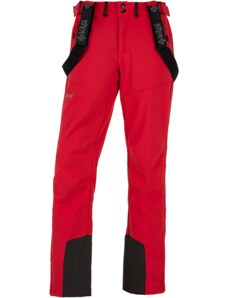
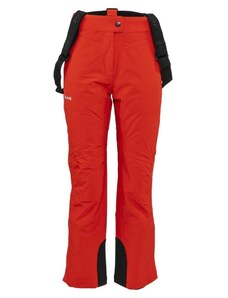
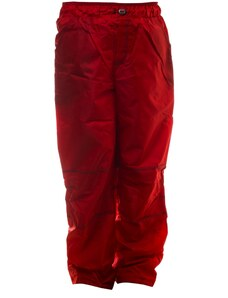
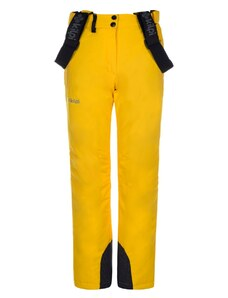

In [ ]:
# Search for visually similar items

idxs, sims = index.search(embeddings_array[int(sample_item_idx[0])], final_num_neighbors=4)

similar_df = df.iloc[idxs].copy()
similar_df['similarity'] = sims
print(sims)
public_dataset_to_html(similar_df, extra_cols=['similarity'])

Above we can see examples of similar products. We can see that indeed the first, the most similar item is the item itself, which is absolutely expected. We don't get 100% similarity because of a numerical precision most likely. Then the second and third item are both red pants. where the second item has a similar shape and it's generally the most similar. Then the third item has a similar color but different shape. And the fourth item has completely different color but it has again, more similar shape.

We can see that it disregarded completely the last item difference in language and we can see that this did search across all the languages without any additional input.

We haven't trained this model for this. Despite that, we implemented search, and categorization, which is amazing.

## Questions?
- Where you are perhaps unclear or feel like you are missing in understanding?
- Can we help to make the dataset for useful for your replicable research?
- If you are reading this post the event, please contacts us on via email or one of the social platforms below.



## Experiment with The Full Dataset!
- [Recording of walk through on Youtube here](https://youtu.be/jLFJObPWU1U)
- [GLAMI-1M Code](https://github.com/glami/glami-1m)
- [GLAMI-1M Paper](https://bmvc2022.mpi-inf.mpg.de/0607.pdf) and [Supplementary](https://docs.google.com/viewer?url=https://github.com/glami/glami-1m/raw/main/media/GLAMI-1M%20Supplementary.pdf)
- [GLAMI-1M Blog Post](https://medium.com/@glami-engineering/glami-1m-multilingual-image-text-fashion-dataset-a72691b6fedb)
- [GLAMI-1M Benchmark at Papers with Code](https://paperswithcode.com/paper/glami-1m-a-multilingual-image-text-fashion-1)

## Attend or Present Future Meetups!

[Miton Times Meetups](https://www.meetup.com/miton-times/)

Post author: [Vaclav Kosar](https://vaclavkosar.com/)